In [19]:
#Setup
import pandas as pd
import numpy as np
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [ ]:
#Combining with concat(), axis 0 is top to bottom, axis 1 is side by side
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016])
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)

#1 is num of rows in axis0
#2 is num of rows in axis1
question1= 6
question2 = 3

In [ ]:
#More concat() combining when one DF contains a column that one does not
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016])

rows = 7
columns = 4
concat_axis0


In [ ]:
#Different shapes using ignore index
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_update_index = pd.concat([head_2015, head_2016], ignore_index=True)
concat_update_index


In [13]:
#Joining DFs with Merge func INNER JOIN: only returns intersection of keys, or elems that appear in both DF with common key
#pd.merge(left=df1, right=df2, on='target column')
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged = pd.merge(left=three_2015, right =three_2016, on='Country')
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


In [14]:
#More joining w merge func, using different join types
#Types of joins:
'''
Inner: only includes elements that appear in both dataframes with a common key
Outer: includes all data from both dataframes
Left: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes
Right: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes
'''
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how='left')
merged_left_updated = pd.merge(left=three_2016, right=three_2015, on='Country', how='left')
#How do merged left and left_updated differ?


In [15]:
#Left joins w merge: changing from inner to left join results in df w more rows and Nans
#Using a left join, interchanging df from left and right params changes results
#SUFFIXES
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country', suffixes=('_2015','_2016'))
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country', suffixes=('_2016', '_2015'))


In [17]:
#Join on index
import pandas as pd
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))

merge_index_left = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'), how='left')

rows = 4
columns= 6
merge_index_left

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


In [ ]:
Summaries:
	                                    pd.concat() pd.merge()
Default Join Type	                    Outer   Inner
Combine > 2 Dataframes at a Time?	    Yes	    No
Can Combine Dataframes Vertically
(axis=0) or Horizontally (axis=1)?      Both    Horizonally

Concat() syntax:
Syntax	Concat (Vertically): concat([df1,df2,df3])
Concat (Horizontally): concat([df1,df2,df3], axis = 1)

Merge() syntax:
Merge (Join on Columns): merge(left = df1, right = df2, how = 'join_type', on = 'Col')
Merge (Join on Index): merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True)


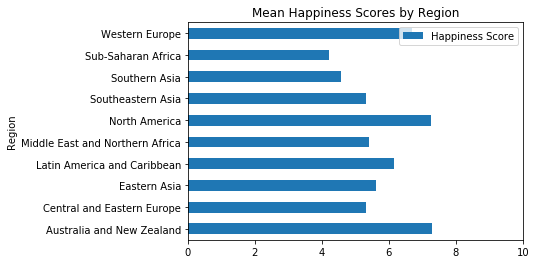

In [21]:
#Review original question: Did world happiness increase,decrease or stay same from 2015-2017
#Use a pivot table to aggregate the data according to Region.
means = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=np.mean)
#Use the `df.plot()` method to plot the results.
means.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10))
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

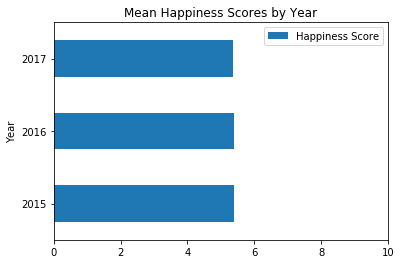

In [31]:
#Challenge: Combine data and create visualization
#rename col in 2017 to match format of 2015 and 2016
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
combined = pd.concat([happiness2015, happiness2016, happiness2017])

pivot_table_combined = combined.pivot_table(index='Year', values='Happiness Score', aggfunc=np.mean) #aggregate happiness score for each year
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10))
#Mean world happiness stayed approximately the same